# OpenET SSEBop - Single Image Example

Compute SSEBop ET (from ETf and ETr) for a single Landsat 8 Collection 1 TOA image.

In [1]:
import pprint

import ee
from IPython.display import Image

import openet.ssebop as ssebop

ee.Initialize()

### Input Parameters

In [2]:
landsat_id = 'LC08_044033_20170716'
# landsat_id = 'LC08_044033_20170801'

ndvi_palette = ['#EFE7E1', '#003300']
et_palette = [
  'DEC29B', 'E6CDA1', 'EDD9A6', 'F5E4A9', 'FFF4AD', 'C3E683', '6BCC5C', 
  '3BB369', '20998F', '1C8691', '16678A', '114982', '0B2C7A']

### Landsat 8 Collection 1 TOA Image

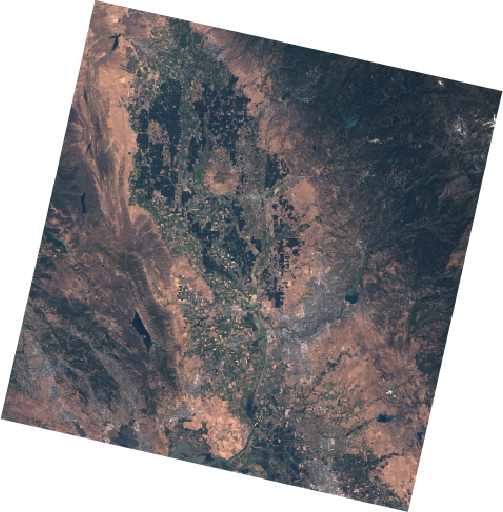

In [3]:
landsat_img = ee.Image('LANDSAT/LC08/C01/T1_RT_TOA/{}'.format(landsat_id))
Image(url=landsat_img.select([3, 2, 1]).getThumbURL({'min': 0.0, 'max': 0.3}),
      embed=True, format='png')

In [4]:
landsat_cs = 30
landsat_crs = landsat_img.select('B3').projection().getInfo()['crs']
landsat_region = landsat_img.geometry().bounds(1, 'EPSG:4326').coordinates().getInfo()
landsat_dt = ee.Date(landsat_img.get('system:time_start'))

In [5]:
# Build the SSEBop object
ssebop_obj = ssebop.Image.from_landsat_c1_toa(landsat_img)

### NDVI

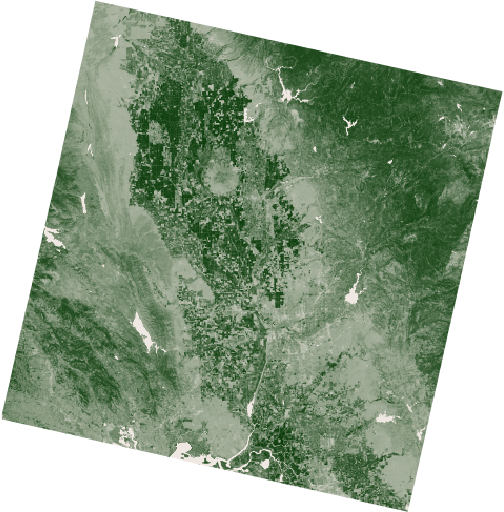

In [6]:
Image(url=ssebop_obj.ndvi.getThumbURL({'min': -0.1, 'max': 0.9, 'palette': ','.join(ndvi_palette)}),
      embed=True, format='png')

### ET fraction

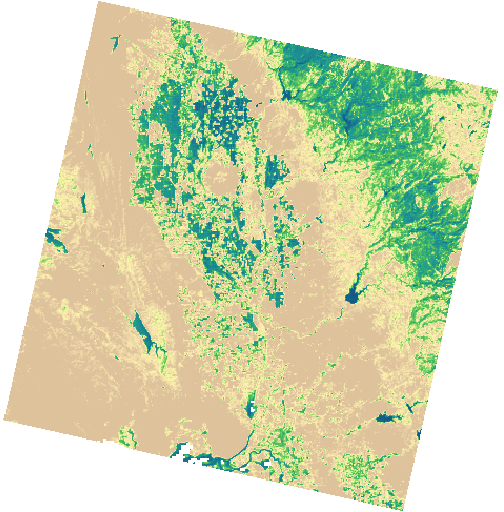

In [7]:
Image(url=ssebop_obj.etf.getThumbURL({'min': 0.0, 'max': 1.2, 'palette': ','.join(et_palette)}),
      embed=True, format='png')

### GRIDMET Daily Reference ET

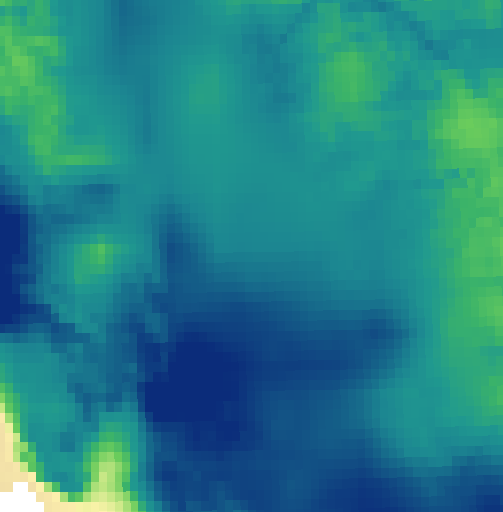

In [8]:
etr_img = ee.Image(ee.ImageCollection('IDAHO_EPSCOR/GRIDMET').select(['etr'])\
    .filterDate(landsat_dt, landsat_dt.advance(1, 'day'))\
    .first())

# Clip and project to the Landsat image footprint and coordinate system
Image(url=etr_img\
          .reproject(crs=landsat_crs, scale=landsat_cs)\
          .getThumbURL({'min': 0.0, 'max': 15, 'palette': ','.join(et_palette), 
                        'region': landsat_region}),
      embed=True, format='png')

### Daily ETa

ETa = ETf * ETr

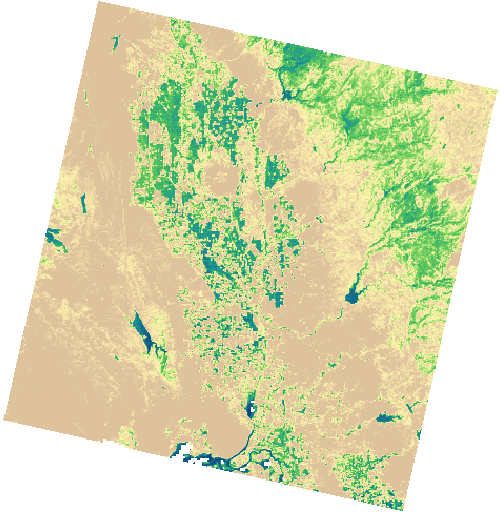

In [9]:
et_img = ssebop_obj.etf.multiply(etr_img)
Image(url=et_img.getThumbURL({'min': 0.0, 'max': 15, 'palette': ','.join(et_palette)}),
      embed=True, format='png')

### SSEBop Image Metadata

In [10]:
pprint.pprint(ssebop_obj.etf.getInfo()['properties'])

{'TCORR': 0.992556758029887,
 'TCORR_INDEX': 0,
 'system:index': 'LC08_044033_20170716',
 'system:time_start': 1500230731090}
